# Яндекc.Недвижимость

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель**

    Установить параметры. 
    Это позволит построить автоматизированную систему: 
    она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Посмотрим первые и последние строки таблицы.




*Курсивом будут отмечаться первые наблюдения для исправлений. Меняем сразу же, дабы не плодить лишних блоков.*

*1. Данные через разделитель '\t'. Табличка не читается.*

*2. Названия колонок не в "змеином регистре".*

*3. Названия колонок не информативны, сложно будет генерировать гипотезы для проверок.*

*4. Похожие параметры разбросаны. Поменять очередность колонок.*

In [ ]:
import pandas as pd
# И все используемое далее
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Убрираем длинные циферки
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    ! gdown --id "Вырезано цензурой"
    df = pd.read_csv('/content/real_estate_data.csv', sep='\t')


In [ ]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})


df_rus = df.rename(columns={'total_images': 'кол_фот',
                            'last_price': 'цена',
                            'total_area': 's_общая',
                            'first_day_exposition': 'дата_публикации',
                            'rooms': 'комнат',
                            'ceiling_height': 'h_пот',
                            'floors_total': 'всего_этаж',
                            'living_area': 'жилая_s',
                            'floor': 'этаж',
                            'is_apartment': 'апарт',
                            'studio': 'студия',
                            'open_plan': 'своб_план',
                            'kitchen_area': 's_кухни',
                            'balcony': 'балконов',
                            'locality_name': 'назв_нас_пункта',
                            'airports_nearest': 'до_аэроп',
                            'city_centers_nearest': 'до_центр',
                            'parks_around3000': 'парков_3_км',
                            'parks_nearest': 'до_ближ_парка',
                            'ponds_around3000': 'вод_3_км',
                            'ponds_nearest': 'до_ближ_вод',
                            'days_exposition': 'дней_с_опубл',})

#df_rus.columns

df_rus = df_rus[['кол_фот', 'дата_публикации', 'цена', 
                 'назв_нас_пункта', 's_общая', 'жилая_s', 's_кухни', 
                 'комнат', 'балконов', 'h_пот', 'всего_этаж', 'этаж', 
                 'апарт', 'студия', 'своб_план', 'до_аэроп', 'до_центр', 
                 'парков_3_км', 'до_ближ_парка', 'вод_3_км', 
                 'до_ближ_вод', 'дней_с_опубл']]
                 
df_rus

,кол_фот,дата_публикации,цена,назв_нас_пункта,s_общая,жилая_s,s_кухни,комнат,балконов,h_пот,...,апарт,студия,своб_план,до_аэроп,до_центр,парков_3_км,до_ближ_парка,вод_3_км,до_ближ_вод,дней_с_опубл
0,20,2019-03-07T00:00:00,"13,000,000.00",Санкт-Петербург,108.00,51.00,25.00,3,NaN,2.70,...,NaN,False,False,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,2018-12-04T00:00:00,"3,350,000.00",посёлок Шушары,40.40,18.60,11.00,1,2.00,NaN,...,NaN,False,False,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,2015-08-20T00:00:00,"5,196,000.00",Санкт-Петербург,56.00,34.30,8.30,2,0.00,NaN,...,NaN,False,False,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,2015-07-24T00:00:00,"64,900,000.00",Санкт-Петербург,159.00,NaN,NaN,3,0.00,NaN,...,NaN,False,False,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,2018-06-19T00:00:00,"10,000,000.00",Санкт-Петербург,100.00,32.00,41.00,2,NaN,3.03,...,NaN,False,False,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,2017-03-21T00:00:00,"9,700,000.00",Санкт-Петербург,133.81,73.30,13.83,3,NaN,3.70,...,NaN,False,False,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,2018-01-15T00:00:00,"3,100,000.00",Тосно,59.00,38.00,8.50,3,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2018-02-11T00:00:00,"2,500,000.00",село Рождествено,56.70,29.70,NaN,2,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,2017-03-28T00:00:00,"11,475,000.00",Санкт-Петербург,76.75,NaN,23.30,2,2.00,3.00,...,NaN,False,False,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


### Описание данных

	• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
	• balcony — число балконов
	• ceiling_height — высота потолков (м)
	• city_centers_nearest — расстояние до центра города (м)
	• days_exposition — сколько дней было размещено объявление (от публикации до снятия)
	• first_day_exposition — дата публикации
	• floor — этаж
	• floors_total — всего этажей в доме
	• is_apartment — апартаменты (булев тип)
	• kitchen_area — площадь кухни в квадратных метрах (м²)
	• last_price — цена на момент снятия с публикации
	• living_area — жилая площадь в квадратных метрах (м²)
	• locality_name — название населённого пункта
	• open_plan — свободная планировка (булев тип)
	• parks_around3000 — число парков в радиусе 3 км
	• parks_nearest — расстояние до ближайшего парка (м)
	• ponds_around3000 — число водоёмов в радиусе 3 км
	• ponds_nearest — расстояние до ближайшего водоёма (м)
	• rooms — число комнат
	• studio — квартира-студия (булев тип)
	• total_area — площадь квартиры в квадратных метрах (м²)
	• total_images — число фотографий квартиры в объявлении

Посмотрим заполненость таблицы

In [ ]:
print()
print('Инфо:')
print(df_rus.info()) # сколько значений и в каком формате
print()
print('Пропусков:')
print(df_rus.isna().mean()) # подсчёт пропусков в долях (перевод в % - лишний код)
print()
print('describe:')
display(df_rus.describe()) # вдруг чего "на глазок" проявится 
print()
print('Дубликатов =', df.duplicated().sum()) # проверим дубликаты


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   кол_фот          23699 non-null  int64  
 1   дата_публикации  23699 non-null  object 
 2   цена             23699 non-null  float64
 3   назв_нас_пункта  23650 non-null  object 
 4   s_общая          23699 non-null  float64
 5   жилая_s          21796 non-null  float64
 6   s_кухни          21421 non-null  float64
 7   комнат           23699 non-null  int64  
 8   балконов         12180 non-null  float64
 9   h_пот            14504 non-null  float64
 10  всего_этаж       23613 non-null  float64
 11  этаж             23699 non-null  int64  
 12  апарт            2775 non-null   object 
 13  студия           23699 non-null  bool   
 14  своб_план        23699 non-null  bool   
 15  до_аэроп         18157 non-null  float64
 16  до_центр         18180 non-null  float64
 17  парко

,кол_фот,цена,s_общая,жилая_s,s_кухни,комнат,балконов,h_пот,всего_этаж,этаж,до_аэроп,до_центр,парков_3_км,до_ближ_парка,вод_3_км,до_ближ_вод,дней_с_опубл
count,"23,699.00","23,699.00","23,699.00","21,796.00","21,421.00","23,699.00","12,180.00","14,504.00","23,613.00","23,699.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,34.46,10.57,2.07,1.15,2.77,10.67,5.89,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,22.03,5.91,1.08,1.07,1.26,6.60,4.89,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,2.00,1.30,0.00,0.00,1.00,1.00,1.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,18.60,7.00,1.00,0.00,2.52,5.00,2.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,30.00,9.10,2.00,1.00,2.65,9.00,4.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,42.30,12.00,3.00,2.00,2.80,16.00,8.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,409.70,112.00,19.00,5.00,100.00,60.00,33.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"



Дубликатов = 0




##### Вывод

Может помешать в расчетах:

    дата_публикации    23699 non-null object    формат не даты
    апарт              2775 non-null object     не верный формат


Полностью заполнены следующие поля:

    число_фото         0.000000
    дата_публикации    0.000000
    конечная_цена      0.000000
    назв_нас_пункта    0.000000
    s_общая            0.000000
    балконов           0.000000
    всего_этаж         0.000000
    этаж               0.000000

До 1% пропусков в:

    s_кухни            0.003629
    своб_план          0.002068

До 10% пропусков в:

    комнат             0.080299
    апарт              0.096122
    
До 25% пропусков в:

    до_аэроп           0.233850
    до_центр           0.232879
    парков_в_3_км      0.232837
    вод_в_3_км         0.232837
    дней_с_публ        0.134225

Серьезно не заполнены:

    жилая_s            0.387991
    h_пот              0.882906
    студия             0.486054
    до_ближ_парка      0.659100
    до_ближ_вод        0.615596
        
Разброс параметров и очевидные аномалии оценим в следующем разделе.

## Предобработка данных

Проверяем, какими значениями заполнена табличка.

Смотрим с сортировкой, чтобы аномалии проявились с концов списка. Еще это пригодится при построении графиков, для определения диаппазонов значений.

В разделе 1 вырисовался не корректный формат некоторых данных. Тут их и поменяем.

*Вот и еще один "+" от русификации таблички: можно сильно сэкономить на комментариях.*

### 'кол_фот:' // 'дата_публикации:'

In [ ]:
display('кол_фот:', df['total_images'].sort_values().unique())

'кол_фот:'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

In [ ]:
# дата_публикации    23699 non-null object    формат не даты
df['first_day_exposition'] = pd.to_datetime( df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' )

display('дата_публикации:', df['first_day_exposition'].sort_values().unique())

'дата_публикации:'

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

### 'цена:' // 'назв_нас_пункта:'

In [ ]:
display('цена:', df['last_price'].sort_values().unique())
# Цена от 12тыс. до 763млн.
# Великоватый разброс.
# Разные валюты?
# Не только квартиры?
# Использовать аккуратно.

'цена:'

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [ ]:
# Не по алфавиту.
#Исправляем лишний креатив в названиях
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции','станции')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')

# Меняем на список, не компьютер же читает:
print('назв_нас_пункта:')
print()
loc = df['locality_name'].sort_values().unique()
for i in range(len(loc)):
    print(loc[i])

назв_нас_пункта:

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Будогощь
городской поселок Виллози
городской поселок Лесогорский
городской поселок Мга
городской поселок Назия
городской поселок Новоселье
городской поселок Павлово
городской поселок Рощино
городской поселок Свирьстрой
городской поселок Советский
городской поселок Фёдоровское
городской поселок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня Бор
дере

### 's_общая:' // 'жилая_s:' // 's_кухни:'

In [ ]:
display('s_общая:', df['total_area'].sort_values().unique())
# При использовании убедиться, что площади в сотни или 12-15 метров реальные.

's_общая:'

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [ ]:
# Пропусков жилая_s            0.387991
display('жилая_s:', df['living_area'].sort_values().unique())
# Сомнительно выглядят жилые площади в 2, 3, 5 квадратов.

'жилая_s:'

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [ ]:
# Пропусков s_кухни            0.003629
display('s_кухни:', df['kitchen_area'].sort_values().unique())
'''
Кухни в 1,3 кв.м. под вопросом, но чего только могут поненапридумывать в студиях.
Ведь можно откидной столик рядом с унитазом назвать обеденным столом.
А если над этим еще и лейку душа повесить...
То вообще получится крайне компактное многофункциональное помещение (3in1). А если розетку - то и кабинет добавится.

Кухни побольше квартир трехкомнатных так же подозрительны.
'''

's_кухни:'

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

'\nКухни в 1,3 кв.м. под вопросом, но чего только могут поненапридумывать в студиях.\nВедь можно откидной столик рядом с унитазом назвать обеденным столом.\nА если над этим еще и лейку душа повесить...\nТо вообще получится крайне компактное многофункциональное помещение (3in1). А если розетку - то и кабинет добавится.\n\nКухни побольше квартир трехкомнатных так же подозрительны.\n'

### 'комнат:' // 'балконов:'

In [ ]:
# Пропусков комнат             0.080299
# комнат             21796 non-null float64  не целое число комнат - это как?
df['rooms'] = df['rooms'].astype('int')

display('комнат:', df['rooms'].sort_values().unique())
# Линейка получилась довольно ровная, но 19 комнат на квартиру...? Не однозначно.
# Да и 0 комнат - это что?
# Похоже должен быть столбец с назначением помещения.

'комнат:'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [ ]:
display('балконов:', df['balcony'].sort_values().unique())
# Дурацкие великоватые значения обязаны коррелироваться между собой. Иначе - мусор.

'балконов:'

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

### 'h_пот:'

In [ ]:
# Пропусков h_пот              0.882906
# h_пот              2775 non-null object    не число
df['ceiling_height'] = df['ceiling_height'].astype('float')

display('h_пот:', df['ceiling_height'].sort_values().unique())
# Проверить повторяемость значений. Скорее всего начало и конец списка - хлам.

'h_пот:'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

### 'всего_этаж:' // 'этаж:'

In [ ]:
display('всего_этаж:', df['floors_total'].sort_values().unique())

'всего_этаж:'

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [ ]:
# Этаж с этажностью в разных форматах оказался. Меняем:
df['floor'] = df['floor'].astype('float')

display('этаж:', df['floor'].sort_values().unique())

'этаж:'

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

### 'апарт:' // 'студия:' // 'своб_план:'

In [ ]:
# Пропусков апарт              0.096122
# апарт              2775 non-null object     не верный формат
df['is_apartment'] = df['is_apartment'].astype('bool')

display('апарт:', df['is_apartment'].sort_values().unique())

'апарт:'

array([False,  True])

In [ ]:
# Пропусков студия             0.486054
display('студия:', df['studio'].sort_values().unique())

'студия:'

array([False,  True])

In [ ]:
# Пропусков своб_план          0.002068
display('своб_план:', df['open_plan'].sort_values().unique())

'своб_план:'

array([False,  True])

### 'до_аэроп:' // 'до_центр:'

In [ ]:
# Пропусков до_аэроп           0.233850
display('до_аэроп:', df['airports_nearest'].sort_values().unique())

'до_аэроп:'

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [ ]:
# Пропусков до_центр           0.232879
display('до_центр:', df['city_centers_nearest'].sort_values().unique())
# До центра чего?
# 66 км великоватый радиус как для города, так и для пригородного района.

'до_центр:'

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

### 'парк в 3 км:' // 'до_ближ_парка:'

In [ ]:
# Пропусков парков_в_3_км      0.232837
display('парков_3_км:', df['parks_around3000'].sort_values().unique())

'парков_3_км:'

array([ 0.,  1.,  2.,  3., nan])

In [ ]:
# Пропусков до_ближ_парка      0.659100
display('до_ближ_парка:', df['parks_nearest'].sort_values().unique())

'до_ближ_парка:'

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

### 'вода в 3 км:' // 'до_ближ_вод:'

In [ ]:
# Пропусков вод_в_3_км         0.232837
display('вод_3_км:', df['ponds_around3000'].sort_values().unique())

'вод_3_км:'

array([ 0.,  1.,  2.,  3., nan])

In [ ]:
# Пропусков до_ближ_вод        0.615596
display('до_ближ_вод:', df['ponds_nearest'].sort_values().unique())

'до_ближ_вод:'

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

### 'дней с опубл:'

In [ ]:
# Пропусков дней_с_публ        0.134225
display('дней_с_опубл:', df['days_exposition'].sort_values().unique())

'дней_с_опубл:'

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [ ]:
# Что там с форматами данных?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
# Проанализируй долю пропусков в столбцах. Если их менее 1%, то можно ими пренебречь.
# Это в "1.1.0.1  Вывод"
    
# `ceiling_height`. Диапазон основного тела выборки этого параметра достаточно узок, это значит, 
# что большинство значения будут плюс минус равны. В данном случае, отлично подходит заполнение медианой.

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
display('h_пот:', df['ceiling_height'].sort_values().unique())
    
# `living_area` и `kitchen_area`. Эти параметры достаточно хорошо связаны с общей площадью, т.к. чаще всего 
# в квартирах площадь кухни и жилая площадь имеют какую-то долю от общей. Эту долю можно посчитать на основе 
# имеющихся данных, например, для разного кол-ва комнат.  
        
for room in df['rooms'].unique():
        median_value = df[(df['rooms'] == room)]['living_area'].median()
        df.loc[(df['rooms'] == room), 'living_area'] = df.loc[(df['rooms'] == room), 'living_area'].fillna(median_value)
        
for room in df['rooms'].unique():
        median_value = df[(df['rooms'] == room)]['kitchen_area'].median()
        df.loc[(df['rooms'] == room), 'kitchen_area'] = df.loc[(df['rooms'] == room), 'kitchen_area'].fillna(median_value)

display('жилая_s:', df['living_area'].sort_values().unique())
display('s_кухни:', df['kitchen_area'].sort_values().unique())

'h_пот:'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

'жилая_s:'

array([  2. ,   3. ,   5. , ..., 347.5, 409. , 409.7])

's_кухни:'

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [ ]:
print(df.isna().mean())

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.00
floors_total           0.00
living_area            0.00
floor                  0.00
is_apartment           0.00
studio                 0.00
open_plan              0.00
kitchen_area           0.01
balcony                0.49
locality_name          0.00
airports_nearest       0.23
city_centers_nearest   0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64


## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

Посчитаем и добавим в таблицу: цену квадратного метра.

In [ ]:
df['price_square_meter'] = df['last_price'] / df['total_area']

### День недели, месяц и год публикации объявления

Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления.

In [ ]:
df['dayofweek'] = df['first_day_exposition'].dt.weekday
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month

### Этаж квартиры

Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой.

In [ ]:
def floor_categ_fun(row):
    """
    Функция, которая посчитает и добавит в таблицу этаж квартиры.
    Варианты: первый, последний, другой.
    """
    floor = row['floor']
    if floor >= 0:
        if floor == 1:
            row['floor_categ'] = 'первый'
        elif row['floor'] == row['floors_total']:
            row['floor_categ'] = 'последний'
        else: row['floor_categ'] = 'другой'
    else:
        row['floor_categ'] = 'NaN'
    return row

df = df.apply(floor_categ_fun, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek,year,month,floor_categ
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8.00,True,...,1.00,482.00,2.00,755.00,NaN,"120,370.37",3,2019,3,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1.00,True,...,0.00,NaN,0.00,NaN,81.00,"82,920.79",1,2018,12,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4.00,True,...,1.00,90.00,2.00,574.00,558.00,"92,785.71",3,2015,8,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,45.00,9.00,True,...,2.00,84.00,3.00,234.00,424.00,"408,176.10",4,2015,7,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13.00,True,...,2.00,112.00,1.00,48.00,121.00,"100,000.00",1,2018,6,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3.00,True,...,1.00,796.00,3.00,381.00,NaN,"72,490.85",1,2017,3,другой
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5.00,38.00,4.00,True,...,NaN,NaN,NaN,NaN,45.00,"52,542.37",0,2018,1,другой
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3.00,29.70,1.00,True,...,NaN,NaN,NaN,NaN,NaN,"44,091.71",6,2018,2,первый
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17.00,30.50,12.00,True,...,2.00,173.00,3.00,196.00,602.00,"149,511.40",1,2017,3,другой


### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
df['living_total_area'] = df['living_area'] / df['total_area']
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek,year,month,floor_categ,living_total_area,kitchen_total_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8.00,True,...,2.00,755.00,NaN,"120,370.37",3,2019,3,другой,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1.00,True,...,0.00,NaN,81.00,"82,920.79",1,2018,12,первый,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4.00,True,...,2.00,574.00,558.00,"92,785.71",3,2015,8,другой,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,45.00,9.00,True,...,3.00,234.00,424.00,"408,176.10",4,2015,7,другой,0.28,0.06
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13.00,True,...,1.00,48.00,121.00,"100,000.00",1,2018,6,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5.00,73.30,3.00,True,...,3.00,381.00,NaN,"72,490.85",1,2017,3,другой,0.55,0.10
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.65,5.00,38.00,4.00,True,...,NaN,NaN,45.00,"52,542.37",0,2018,1,другой,0.64,0.14
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.65,3.00,29.70,1.00,True,...,NaN,NaN,NaN,"44,091.71",6,2018,2,первый,0.52,0.16
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17.00,30.50,12.00,True,...,3.00,196.00,602.00,"149,511.40",1,2017,3,другой,0.40,0.30


## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

Строим гистограммы для каждого параметра.

,count,mean,median
total_area_group,,,
"(0, 100]",21863,52.93,49.90
"(100, 200]",1609,129.52,121.20
"(200, 300]",166,239.20,235.00
"(300, 1000]",61,408.19,374.60


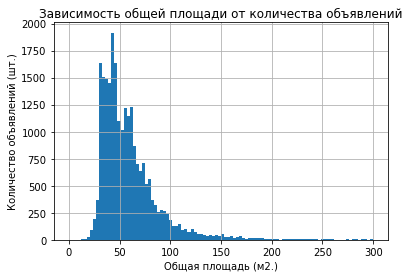

,count,mean,median
last_price_group,,,
"(0.0, 700000.0]",79,"584,964.43","600,000.00"
"(700000.0, 9000000.0]",20285,"4,515,525.28","4,300,000.00"
"(9000000.0, 60000000.0]",3234,"15,897,870.50","12,900,000.00"
"(60000000.0, 800000000.0]",101,"118,522,857.54","85,000,000.00"


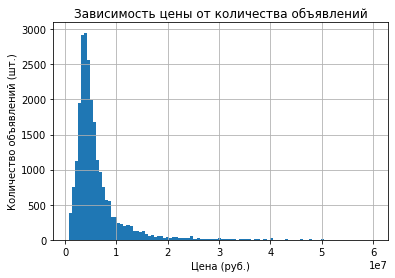

,count,mean,median
rooms_group,,,
"(0, 5]",23307,2.05,2.00
"(5, 10]",187,6.64,6.00
"(10, 15]",6,12.83,13.00
"(15, 20]",2,17.50,17.50


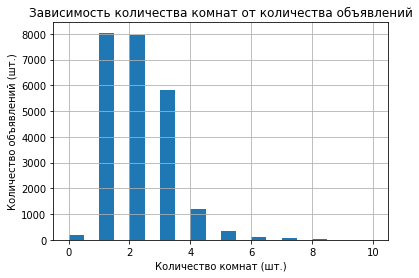

,count,mean,median
ceiling_height_group,,,
"(0.0, 2.2]",15,1.88,2.00
"(2.2, 3.0]",22155,2.65,2.65
"(3.0, 4.0]",1454,3.32,3.25
"(4.0, 101.0]",75,12.54,4.90


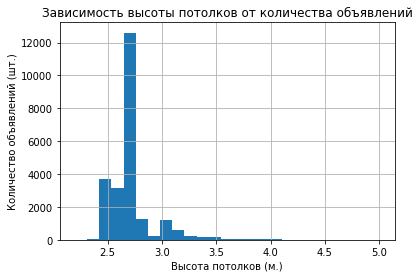

In [ ]:
# Поиграем группировкой, чтобы вычислить "хвосты"
df['total_area_group'] = pd.cut(df['total_area'],[0, 100, 200, 300, 1000])
display(df.groupby('total_area_group')['total_area'].agg(['count','mean','median']))
# Строим гистограмму с учетом группировки, дабы на картинке проявилась фигура
display(df['total_area'].hist(bins=100, range = (0, 300)))
plt.title("Зависимость общей площади от количества объявлений")
plt.xlabel("Общая площадь (м2.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 
print()

df['last_price_group'] = pd.cut(df['last_price'],[0, 7e+05, 9e+06, 6e+07, 8e+08])
display(df.groupby('last_price_group')['last_price'].agg(['count','mean','median']))
display(df['last_price'].hist(bins=100, range = (7e+05, 6e+07)))
plt.title("Зависимость цены от количества объявлений")
plt.xlabel("Цена (руб.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 
print()

df['rooms_group'] = pd.cut(df['rooms'],[0, 5, 10, 15, 20])
display(df.groupby('rooms_group')['rooms'].agg(['count','mean','median']))
display(df['rooms'].hist(bins=20, range = (0, 10)))
plt.title("Зависимость количества комнат от количества объявлений")
plt.xlabel("Количество комнат (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 
print()

df['ceiling_height_group'] = pd.cut(df['ceiling_height'],[0, 2.2, 3, 4, 101])
display(df.groupby('ceiling_height_group')['ceiling_height'].agg(['count','mean','median']))
display(df['ceiling_height'].hist(bins=25, range = (2.2, 5)))
plt.title("Зависимость высоты потолков от количества объявлений")
plt.xlabel("Высота потолков (м.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 
print()

##### Вывод:

    если пожертвовать до 10% имеющихся значений, то распределения значений получаются перспективными для анализа.

### Время продажи квартиры

Задание: 

    - Изучите время продажи квартиры. 
    - Постройте гистограмму. 
    - Посчитайте среднее и медиану. 
    - Опишите, сколько обычно занимает продажа. 
    - Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

,count,mean,median
days_exposition_group,,,
"(0, 3]",4,1.75,2.00
"(3, 7]",844,5.12,5.00
"(7, 459]",17615,126.91,89.00
"(459, 1200]",1964,687.71,630.50
"(1200, 1600]",91,"1,329.59","1,315.00"


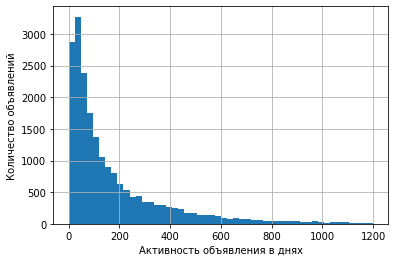

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [ ]:
df['days_exposition_group'] = pd.cut(df['days_exposition'],[0, 3, 7, 459, 1200,1600])
display(df.groupby('days_exposition_group')['days_exposition'].agg(['count','mean','median']))
display(df['days_exposition'].hist(bins=50, range = (0, 1200)))
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 

display(df['days_exposition'].describe())

##### Вывод:

    - 4% квартир продается за неделю.
    - 25% квартир реализоваться в течении 1,5 месяцев.
    - Половина квартир уходит за 95 дней.
    - Если квартина не нашла нового владельца за 459 дней (90% продаж), то сроки закрытия сделки не прогнозируются.

Напомню, что 13,42% объявлений не имеет значений в графе days_exposition.

,count,mean,median
days_exposition_group,,,
"(0, 3]",4,1.75,2.00
"(3, 7]",844,5.12,5.00
"(7, 459]",17615,126.91,89.00
"(459, 1200]",1964,687.71,630.50
"(1200, 1600]",91,"1,329.59","1,315.00"


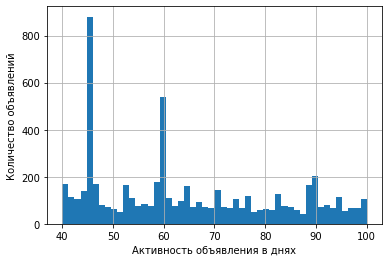

In [ ]:
df['days_exposition_group'] = pd.cut(df['days_exposition'],[0, 3, 7, 459, 1200,1600])
display(df.groupby('days_exposition_group')['days_exposition'].agg(['count','mean','median']))
display(df['days_exposition'].hist(bins=50, range = (40, 100)))
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 


### Редкие и выбивающиеся значения

Задание: 

    - Уберите редкие и выбивающиеся значения.
    - Опишите, какие особенности обнаружили.
    
В пп 4.1 и 4.2 при построении графиков редкие значения исключались. В пределах 10% от количества значений.

Иначе графики выглядели бы следующим образом:

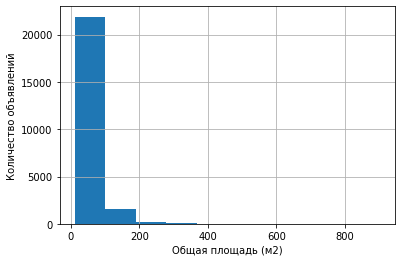

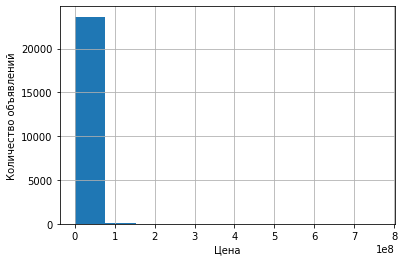

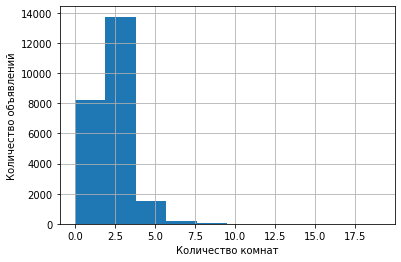

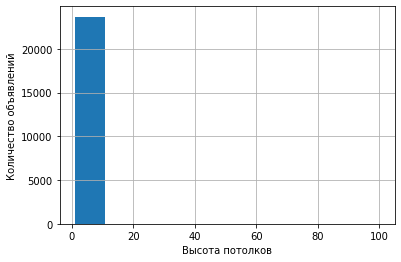

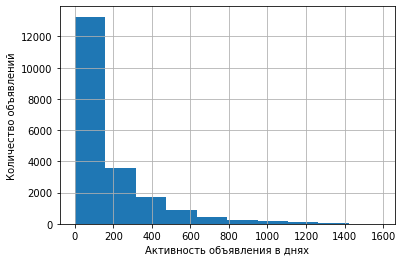

In [ ]:
display(df['total_area'].hist())
plt.xlabel("Общая площадь (м2)")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['last_price'].hist())
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['rooms'].hist())
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['ceiling_height'].hist())
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")
plt.show() 

display(df['days_exposition'].hist())
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 

### Какие факторы больше всего влияют на стоимость квартиры?

Задание: 

    - Какие факторы больше всего влияют на стоимость квартиры?
    - Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
    - Также изучите зависимость от даты размещения: дня недели, месяца и года.

####Цена от квадратного метра

,count,mean,median
price_square_meter_group,,,
"(0.0, 16000.0]",81,"13,462.88","14,130.43"
"(16000.0, 400000.0]",23540,"98,088.63","95,000.00"
"(400000.0, 2000000.0]",78,"590,988.41","500,000.00"


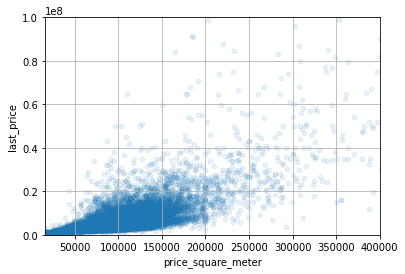

In [ ]:
df['price_square_meter_group'] = pd.cut(df['price_square_meter'],[0, 1.6e+04, 0.4e+06, 2e+06])
display(df.groupby('price_square_meter_group')['price_square_meter'].agg(['count','mean','median']))
display(df.plot(x='price_square_meter', y='last_price', kind='scatter', alpha=0.1, xlim=(16e3, 4e5), ylim=(0, 1e8), grid=True))
plt.show() 

##### Вывод: 
    
    Цена, как правило, имеет прямую корреляцию. Хотя и слабую.

####Цена от числа комнат

,count,mean,median
rooms_group,,,
"(0, 1]",8047,1.00,1.00
"(1, 3]",13754,2.42,2.00
"(3, 6]",1611,4.33,4.00
"(6, 20]",90,8.03,7.00


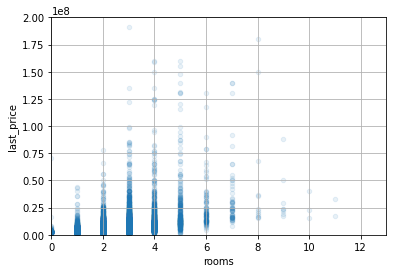

In [ ]:
df['rooms_group'] = pd.cut(df['rooms'],[0, 1, 3, 6, 20])
display(df.groupby('rooms_group')['rooms'].agg(['count','mean','median']))
display(df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 13), ylim=(0, 2e8), grid=True))
plt.show() 

##### Вывод: 
    
    Количество комнат, опять же как правило, имеет прямую слабую корреляцию.

####Цена от этажа (первого или последнего)

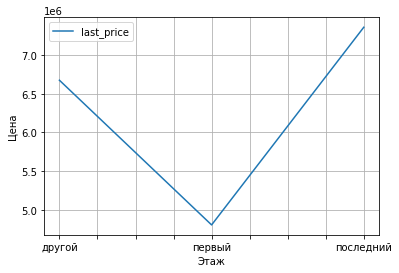

In [ ]:
#plt.show(sns.barplot(x=df['floor_categ'], y=df['last_price'], ci=None, color='green'))
display(pd.pivot_table(df, index=['floor_categ'], values=['last_price']).plot(grid=True))
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show() 

##### Вывод: 
    
    -Первый этаж расположения квартиры поможет сильно сэкономить.
    -За последний этаж придется доплачивать. Но меньше, чем экономия за 1 этаж.

#### Цена от удалённости до центра

,count,mean,median
city_centers_nearest_group,,,
"(0, 15000]",11856,"9,748.79","10,931.00"
"(15000, 30000]",4988,"18,764.26","17,027.00"
"(30000, 45000]",1064,"32,823.49","32,385.00"
"(45000, 66000]",272,"51,086.22","51,110.50"


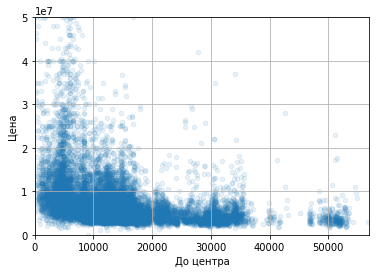

In [ ]:
df['city_centers_nearest_group'] = pd.cut(df['city_centers_nearest'],[0, 15000, 30000, 45000, 66000])
display(df.groupby('city_centers_nearest_group')['city_centers_nearest'].agg(['count','mean','median']))
display(df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 5.7e4), ylim=(0, 5e7), grid=True))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 


##### Вывод: 
    
    -Вполне ожидаемо, что чем дальше от центра, тем меньше цена.
    -Интересная география Ленинградской области:
       -- небольшой провал цен в районе 25 км от центра;
       -- малое количество предложений на радиусе 40 км (+/-).

#### Цена от даты размещения: дня недели, месяца и года

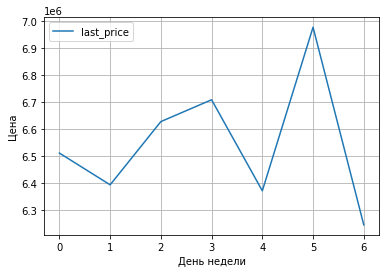

In [ ]:
#Цена от даты размещения: дня недели

display(pd.pivot_table(df, index=['dayofweek'], values=['last_price']).plot(grid=True))
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.show() 

##### Вывод. День недели

Статистика для игроков: 
    
    -Покупать лучше по воскресениям, пятницам, вторникам.
    -Продавать интереснее по субботам, четвергам и средам.
    -Понедельник крайний случай для первых двух вариантов.

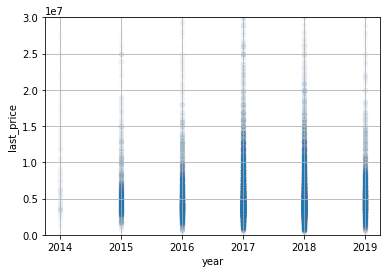

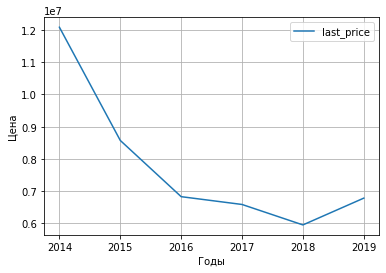


Коэффициент корреляции: -0.04308903619950858
Коэффициент корреляции отрицательный, заметный.


In [ ]:
# Цена от даты размещения: года

display(df.plot(x='year', y='last_price', kind='scatter', alpha=0.01, ylim=(0, 3e7), grid=True))
display(pd.pivot_table(df, index=['year'], values=['last_price']).plot(grid=True))
plt.xlabel("Годы")
plt.ylabel("Цена")
plt.show()

print()
print('Коэффициент корреляции:', df['last_price'].corr(df['year']))
print('Коэффициент корреляции отрицательный, заметный.')

##### Вывод. Год
    
    -С `14 по `18 год цена падала с ростом предложений.
    -В `19 году предложение снизилось, цена приподнялась.

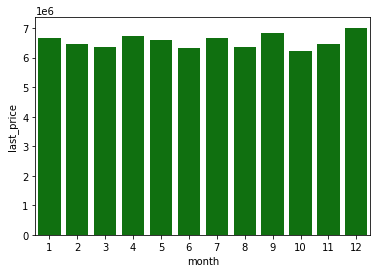

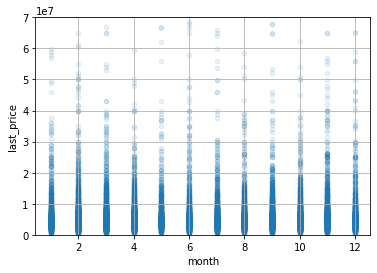


Коэффициент корреляции: 0.0027791287507397252
Коэффициент корреляции формально положительный, почти нулевой.


In [ ]:
# Цена от даты размещения: месяца

plt.show(sns.barplot(x=df['month'], y=df['last_price'], ci=None, color='green'))
display(df.plot(x='month', y='last_price', kind='scatter', alpha=0.1, ylim=(0, 7e7), grid=True))
#display(pd.pivot_table(df, index=['month'], values=['last_price']).plot(grid=True))
#plt.xlabel("Месяцы")
#plt.ylabel("Цена")
plt.show()

df['price_square_meter'].sort_values().unique()

print()
print('Коэффициент корреляции:', df['last_price'].corr(df['month']))
print('Коэффициент корреляции формально положительный, почти нулевой.')

##### Вывод. Месяц
    
    Цена от месяца осуществления сделки не зависит.

### 10 населённых пунктов с наибольшим числом объявлений

Задание: 

    - Выберите 10 населённых пунктов с наибольшим числом объявлений.
    - Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
    - Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
      Эти данные можно найти по имени в столбце `locality_name`.

In [ ]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений.
# Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

print()
print('10 населённых пунктов с наибольшим числом объявлений с максимальной средней ценой квадратного метра:')
display(df.groupby('locality_name')['price_square_meter']
        .agg(['count','mean'])
        .sort_values(by='count', ascending=False)
        .head(10))

# Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
print()
print()
print('По 10 населённых пунктов с самой высокой и низкой стоимостью жилья:')
display(df.groupby('locality_name')['last_price']
        .agg(['count','max'])
        .sort_values(by='max', ascending=False)
        .head(10))
display(df.groupby('locality_name')['last_price']
        .agg(['count','min'])
        .sort_values(by='min')
        .head(10))


10 населённых пунктов с наибольшим числом объявлений с максимальной средней ценой квадратного метра:


,count,mean
locality_name,,
Санкт-Петербург,15721,"114,849.01"
поселок Мурино,556,"85,681.76"
поселок Шушары,440,"78,677.36"
Всеволожск,398,"68,654.47"
Пушкин,369,"103,125.82"
Колпино,338,"75,424.58"
поселок Парголово,327,"90,175.91"
Гатчина,307,"68,746.15"
деревня Кудрово,299,"92,473.55"




По 10 населённых пунктов с самой высокой и низкой стоимостью жилья:


,count,max
locality_name,,
Санкт-Петербург,15721,"763,000,000.00"
Пушкин,369,"42,000,000.00"
Колпино,338,"36,900,000.00"
поселок Репино,4,"28,000,000.00"
Всеволожск,398,"24,412,900.00"
Зеленогорск,24,"23,000,000.00"
Петергоф,201,"22,000,000.00"
Сестрорецк,183,"21,700,000.00"
Красное Село,178,"21,000,000.00"


,count,min
locality_name,,
Санкт-Петербург,15721,"12,190.00"
поселок станции Свирь,2,"430,000.00"
Сланцы,112,"430,000.00"
деревня Старополье,3,"440,000.00"
деревня Ям-Тесово,2,"450,000.00"
городской поселок Будогощь,4,"450,000.00"
деревня Вахнова Кара,1,"450,000.00"
поселок Совхозный,2,"470,000.00"
деревня Выскатка,2,"470,000.00"


### Изучение предложения квартир

Задание: 

    - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
    - Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр.
    - Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
    - После этого посчитайте среднюю цену для каждого километра.
    - Постройте график: он должен показывать, как цена зависит от удалённости от центра.
    - Определите границу, где график сильно меняется — это и будет центральная зона.

Text(0, 0.5, 'Цена')

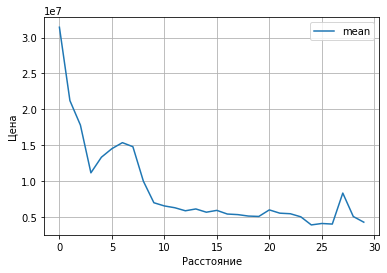

In [ ]:
df['city_cent_near_km'] = round(df['city_centers_nearest'] / 1000)
dfp= df[df['locality_name'] == 'Санкт-Петербург']

display(pd.pivot_table(dfp.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'), 
                       index=['city_cent_near_km'], values=['mean']).plot(grid=True))
plt.xlabel("Расстояние")
plt.ylabel("Цена")

##### Вывод: 
    
    -В центре дорого. Чем дальше, тем дешевле.
    -Особенность географии Санкт-Петербурга:
       -- рост цен на расстоянии 3-8 км;
       -- есть всплеск на 27 км.

### Cегмент квартир

Задание: 

    - Выделите сегмент квартир в центре.
    - Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
    - Также выделите факторы, которые влияют на стоимость квартиры
      (число комнат, этаж, удалённость от центра, дата размещения объявления).
    - Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count,mean,median
total_area_group,,,
"(0, 100]",14048,54.60,51.00
"(100, 200]",1460,130.05,122.04
"(200, 300]",156,240.53,236.20
"(300, 1000]",57,411.89,380.00


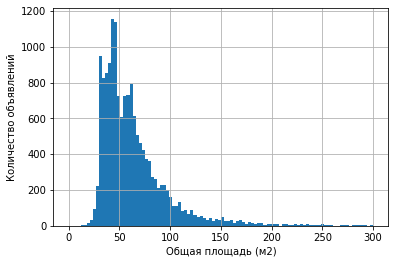

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,count,mean,median
last_price_group,,,
"(0.0, 700000.0]",1,"12,190.00","12,190.00"
"(700000.0, 9000000.0]",12527,"5,218,890.88","4,950,000.00"
"(9000000.0, 60000000.0]",3092,"15,977,621.84","12,900,000.00"
"(60000000.0, 800000000.0]",101,"118,522,857.54","85,000,000.00"


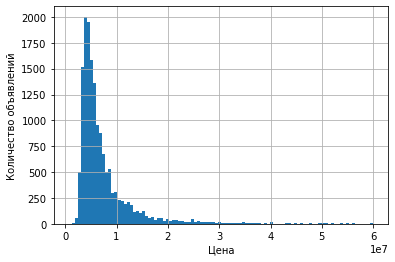

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,mean,median
rooms_group,,,
"(0, 5]",15425,2.13,2.00
"(5, 10]",178,6.65,6.00
"(10, 15]",6,12.83,13.00
"(15, 20]",2,17.50,17.50


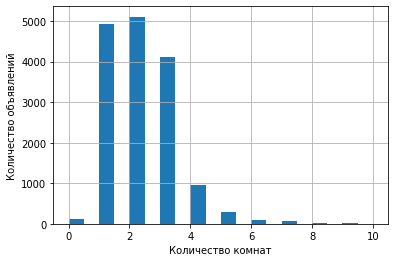

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,mean,median
ceiling_height_group,,,
"(0.0, 2.2]",4,1.69,1.88
"(2.2, 3.0]",14316,2.66,2.65
"(3.0, 4.0]",1343,3.32,3.25
"(4.0, 101.0]",58,10.95,4.58


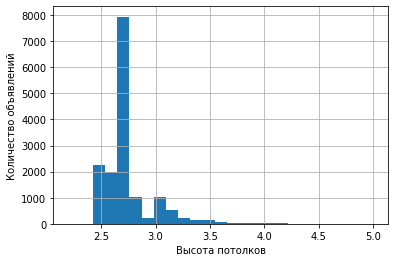

In [ ]:
# Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

dfp['total_area_group'] = pd.cut(dfp['total_area'],[0, 100, 200, 300, 1000])
display(dfp.groupby('total_area_group')['total_area'].agg(['count','mean','median']))
display(dfp['total_area'].hist(bins=100, range = (0, 300)))
plt.xlabel("Общая площадь (м2)")
plt.ylabel("Количество объявлений")
plt.show() 
print()

dfp['last_price_group'] = pd.cut(df['last_price'],[0, 7e+05, 9e+06, 6e+07, 8e+08])
display(dfp.groupby('last_price_group')['last_price'].agg(['count','mean','median']))
display(dfp['last_price'].hist(bins=100, range = (7e+05, 6e+07)))
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show() 
print()

dfp['rooms_group'] = pd.cut(df['rooms'],[0, 5, 10, 15, 20])
display(dfp.groupby('rooms_group')['rooms'].agg(['count','mean','median']))
display(dfp['rooms'].hist(bins=20, range = (0, 10)))
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.show() 
print()

dfp['ceiling_height_group'] = pd.cut(df['ceiling_height'],[0, 2.2, 3, 4, 101])
display(dfp.groupby('ceiling_height_group')['ceiling_height'].agg(['count','mean','median']))
display(dfp['ceiling_height'].hist(bins=25, range = (2.2, 5)))
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")
plt.show() 
print()

##### Вывод. Площадь, цена, число комнат, высота потолков
    
    -Форму распределения параметров, вычет Ленинградской области не поменял. Даже всплески сохранились.
     Визуально изменились только значения по оси Y.
    -А вот сравнение табличных значений кое-что выявило:
    
        -- медиана площадей до 100 м2  увеличилась с 49.90  до 51.00
        -- медиана площадей до 200 м2  увеличилась с 121.20 до 122.04
        -- медиана площадей до 300 м2  увеличилась с 235.00 до 236.20
        -- медиана площадей до 1000 м2 увеличилась с 374.60 до 380.00
           --- Средняя площадь квартир в Питере больше, чем в области
           
        -- медиана стоимости объекта до 700000 уменьшилась  с 600000  до 12190 (79 объектов против 1)
        -- медиана стоимости объекта до 9000000 увеличилась с 4300000 до 4950000
           --- Средняя цена квартир от 700 тыс до 9 млн в Питере больше, чем в области
        -- медиана стоимости объекта от 9000001 до 800000000 не изменилась
           --- Почти все эти объекты располагаются в Питере
           
        -- медиана количества комнат во всем диапазоне не изменилась
           --- Среднее количество комнат в квартирах Питера и области одинаковое
           
        -- медиана высоты потолков до 2.2  м  уменьшилась с 2.000 тыс до 1.875
        -- медиана высоты потолков до 3.0  м  увеличилась с 2.600 тыс до 2.650
        -- медиана высоты потолков до 4.0  м  не изменилась
        -- медиана высоты потолков до 101.0 м уменьшилась с 4.900 тыс до 4.575
           --- Средняя высота комнат в квартирах Питера побольше, чем в области; 
               т.к. второй диапазон включает подавляющее большинство исследуемых значений.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,mean,median
rooms_group,,,
"(0, 1]",4937,1.00,1.00
"(1, 3]",9229,2.45,2.00
"(3, 6]",1358,4.36,4.00
"(6, 20]",87,8.06,7.00


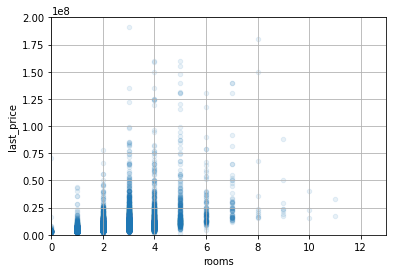

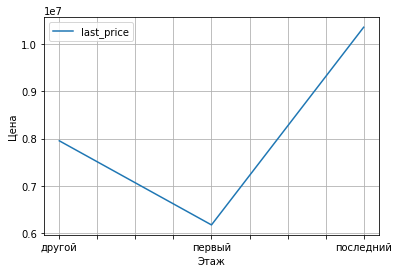

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,count,mean,median
city_centers_nearest_group,,,
"(0, 15000]",11828,"9,756.82","10,941.50"
"(15000, 30000]",3832,"17,294.52","16,453.00"
"(30000, 45000]",0,NaN,NaN
"(45000, 66000]",0,NaN,NaN


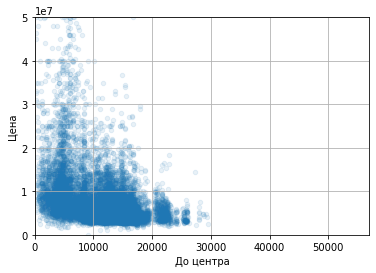

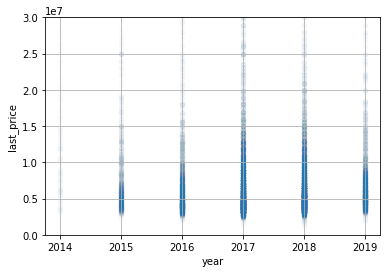

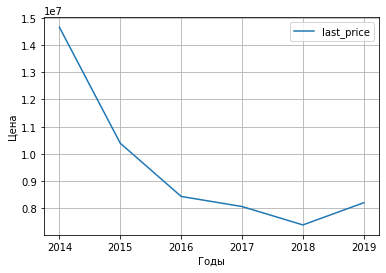

In [ ]:
# Также выделите факторы, которые влияют на стоимость квартиры
# (число комнат, этаж, удалённость от центра, дата размещения объявления).

dfp['rooms_group'] = pd.cut(df['rooms'],[0, 1, 3, 6, 20])
display(dfp.groupby('rooms_group')['rooms'].agg(['count','mean','median']))
display(dfp.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 13), ylim=(0, 2e8), grid=True))
plt.show() 

#plt.show(sns.barplot(x=df['floor_categ'], y=df['last_price'], ci=None, color='green'))
display(pd.pivot_table(dfp, index=['floor_categ'], values=['last_price']).plot(grid=True))
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show() 

dfp['city_centers_nearest_group'] = pd.cut(df['city_centers_nearest'],[0, 15000, 30000, 45000, 66000])
display(dfp.groupby('city_centers_nearest_group')['city_centers_nearest'].agg(['count','mean','median']))
display(dfp.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 5.7e4), ylim=(0, 5e7), grid=True))
#display(pd.pivot_table(df, index=['city_centers_nearest'], values=['last_price']).plot(grid=True))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 

display(dfp.plot(x='year', y='last_price', kind='scatter', alpha=0.01, ylim=(0, 3e7), grid=True))
display(pd.pivot_table(dfp, index=['year'], values=['last_price']).plot(grid=True))
plt.xlabel("Годы")
plt.ylabel("Цена")
plt.show()

##### Вывод. Число комнат, этаж, удалённость от центра, дата размещения объявления

           --- Зависимость цены от количества комнат не поменялась
           --- Цена от этажей поменяла только размер, но не распределение
           --- График цены от расстояния до центра стал с отсечкой на 30 км
           --- Распределение цены по годам сохранилось, только цены стали повыше
           
## Пропущенные значения

Раз уж в чек листе есть такие галочки, то сейчас чего-нибудь позаполним.

Возьмем параметр "до_центр" (city_centers_nearest) там 23.29% пропусков. За одно можно будет сравнить распределения в "придуманных" табличках с реальными.


Данные по всей области:


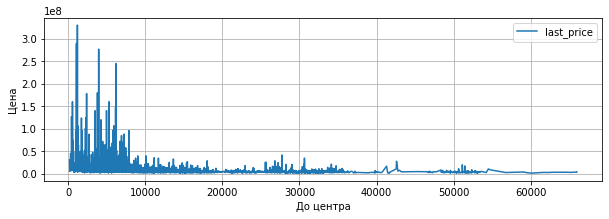

Данные по Питеру:



Просле замены на медианы:

Пропусков в city_centers_nearest: 0.0

Данные по всей области:


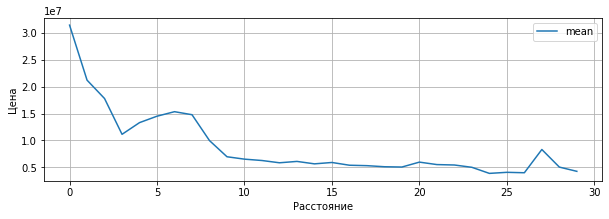

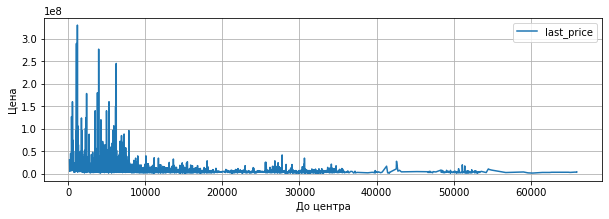

Данные по Питеру:


Text(0, 0.5, 'Цена')

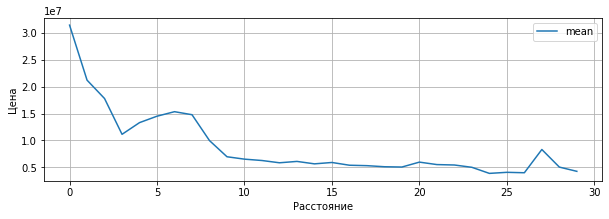

In [ ]:
# Данные по всей области:
print()
print('Данные по всей области:')
#display(df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 5.7e4), ylim=(0, 5e7), grid=True))
display(pd.pivot_table(df, index=['city_centers_nearest'], values=['last_price']).plot(grid=True, figsize=(10, 3)))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 

# Данные по Питеру:
print('Данные по Питеру:')
display(pd.pivot_table(dfp.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'), 
                       index=['city_cent_near_km'], values=['mean']).plot(grid=True, figsize=(10, 3)))
plt.xlabel("Расстояние")
plt.ylabel("Цена")



# Просто заменим на медианы:
print()
print('Просле замены на медианы:')
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())
print()

# Проверяем наличие пропусков в city_centers_nearest:
print('Пропусков в city_centers_nearest:', df['city_centers_nearest'].isna().mean())

# Данные по всей области:
print()
print('Данные по всей области:')
#display(df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.1, xlim=(0, 5.7e4), ylim=(0, 5e7), grid=True))
display(pd.pivot_table(df, index=['city_centers_nearest'], values=['last_price']).plot(grid=True, figsize=(10, 3)))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 

# Данные по Питеру:
print('Данные по Питеру:')
display(pd.pivot_table(dfp.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'), 
                       index=['city_cent_near_km'], values=['mean']).plot(grid=True, figsize=(10, 3)))
plt.xlabel("Расстояние")
plt.ylabel("Цена")

##### Вывод:

    На таком масштабе ничего не вылезло (графики 1 в 1), так что и дробить медиану по категориям не целесообразно.



Пропусков в city_centers_nearest: 0.0


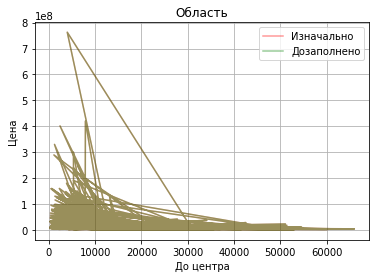

<Figure size 720x216 with 0 Axes>

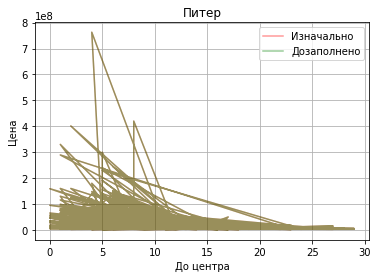

<Figure size 720x216 with 0 Axes>

In [ ]:
# Просто заменим на медианы:
df_m = df
print()
#print('Просле замены на медианы:')
df_m['city_centers_nearest'] = df_m['city_centers_nearest'].fillna(df_m['city_centers_nearest'].median())
print()

# Проверяем наличие пропусков в city_centers_nearest:
print('Пропусков в city_centers_nearest:', df_m['city_centers_nearest'].isna().mean())

# Данные по Питеру:
dfp_m= df_m[df['locality_name'] == 'Санкт-Петербург']


# Данные по всей области:
plt.plot(df['city_centers_nearest'], df['last_price'], 'r', df_m['city_centers_nearest'], df['last_price'], 'g', 
         alpha=0.4)
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.title("Область")
plt.legend(['Изначально', 'Дозаполнено'])
plt.grid()
plt.figure(figsize=(10, 3))
plt.show()

# Данные по Питеру:
plt.plot(dfp['city_cent_near_km'], dfp['last_price'], 'r', dfp_m['city_cent_near_km'], dfp['last_price'], 'g', 
         alpha=0.4)
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.title("Питер")
plt.legend(['Изначально', 'Дозаполнено'])
plt.grid()
plt.figure(figsize=(10, 3))
plt.show()

## Общий вывод

Исследование данных сервиса Яндекc Недвижимость по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, согласно прилагаемому заданию выполнено в полном объеме. 

Полученные статистические данные можно использовать для определения рыночной стоимости объектов недвижимости. Все промежутоные выводы вынесены в содержание для простоты ориентирования. 

А вот построить автоматизированную систему: она отследит аномалии и мошенническую деятельность...? Начало для этого положено, но до результата отсель далековато.  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод